# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

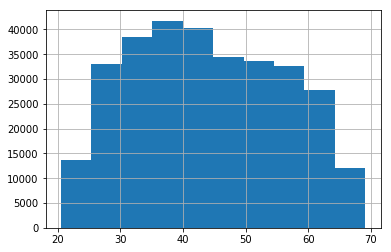

In [8]:
(app_train['DAYS_BIRTH']/365).hist()

In [18]:
app_train['year_interval'] = pd.cut(app_train['DAYS_BIRTH']/365, 10)
new_df = app_train.groupby('year_interval').mean()
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
year_interval,,,,,,,,,,,,,,,,,,,,,
"(20.469, 25.378]",277118.454931,0.122012,0.248410,0.321442,0.626435,0.225967,146812.838906,420473.132064,21960.732015,379885.046374,...,0.000073,0.000512,0.004898,0.009122,0.007217,0.033982,0.156576,0.269346,1.569868,0.002705
"(25.378, 30.238]",277872.170284,0.111390,0.104718,0.384822,0.603828,0.546956,165428.742611,510049.971730,25966.069132,459252.060265,...,0.000634,0.000906,0.000694,0.007288,0.007687,0.033868,0.231706,0.257379,1.794148,0.003351
"(30.238, 35.099]",277950.762581,0.101900,0.098855,0.410226,0.630367,0.821858,178402.528319,573771.345316,27448.987418,515618.177545,...,0.000703,0.000625,0.000078,0.006184,0.007768,0.034566,0.287046,0.252480,1.782475,0.003955
"(35.099, 39.959]",278231.199650,0.089468,0.095359,0.405288,0.661143,0.846808,179638.253952,628073.474975,28280.686723,564980.878216,...,0.000575,0.000551,0.000120,0.006156,0.007078,0.033818,0.279953,0.264875,1.828877,0.007998
"(39.959, 44.819]",278847.830260,0.078984,0.094895,0.392763,0.684734,0.591078,181461.771472,648989.912900,28760.253606,583220.956358,...,0.000942,0.000793,0.000074,0.006061,0.006061,0.034195,0.295607,0.260745,1.878371,0.015043


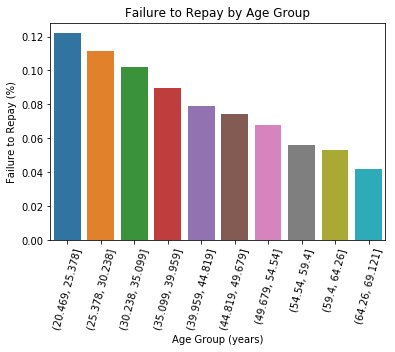

In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt

px = new_df.index
py = new_df['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

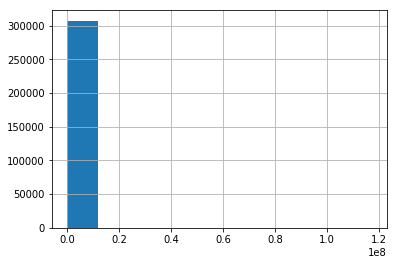

In [20]:
app_train['AMT_INCOME_TOTAL'].hist()

In [22]:
app_train['amt_income_total_interval'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
new_df = app_train.groupby('amt_income_total_interval').mean()
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
amt_income_total_interval,,,,,,,,,,,,,,,,,,,,,
"(25649.999, 81000.0]",277043.955886,0.081908,0.114432,0.176006,0.685754,0.375460,66254.124685,349964.649471,16708.066994,312117.900549,...,0.000299,0.000299,0.000270,0.005838,0.006471,0.032055,0.159830,0.223458,1.589714,0.374322
"(81000.0, 99000.0]",278577.382596,0.082232,0.121565,0.220178,0.688672,0.407629,91089.278813,428164.658620,19962.134058,381692.300318,...,0.000396,0.000627,0.000198,0.005292,0.006319,0.030806,0.193918,0.246682,1.737717,0.248283
"(99000.0, 112500.0]",278653.817975,0.087192,0.111063,0.262769,0.695478,0.407348,111333.276330,478992.017111,22144.588886,427010.102238,...,0.000488,0.000352,0.000244,0.006056,0.005928,0.032523,0.217053,0.256945,1.844276,0.199014
"(112500.0, 135000.0]",277726.641323,0.084894,0.096993,0.309239,0.690188,0.416262,131852.488657,540955.693914,24726.963858,483031.367268,...,0.000512,0.000532,0.000553,0.006512,0.006678,0.032726,0.248122,0.257510,1.903579,0.171918
"(135000.0, 147150.0]",277690.509116,0.090007,0.073621,0.307870,0.676437,0.378260,142953.056026,604463.525040,26519.573061,541242.533934,...,0.000231,0.000000,0.000231,0.007632,0.007105,0.036053,0.251053,0.268158,1.863947,0.209093


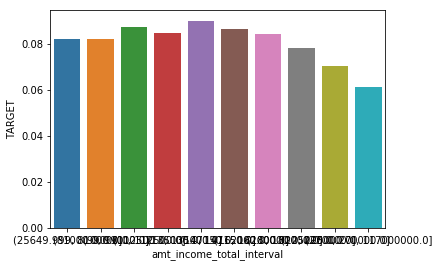

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

px = new_df.index
py = new_df['TARGET']
sns.barplot(px, py)
